# tests for Tier-2 UDP (User Defined Processes)
Tier-2 datasets are in 10m resolution..... therefore the area should be not too big to reduce the processing costs and reduce the waiting time <br>
<br>

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here we just hardcode Luxemburg
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[5.03, 51.22], [5.05, 51.22], [5.05, 51.2], [5.03, 51.2], [5.03, 51.22]
            ]]
           }

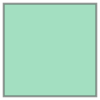

In [5]:
# show the extent
shape(polygon)


## PPI dataset in original resolution and projection for year 2020

In [6]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_ppi_10m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ppi_10m.json",
    geometry=polygon,   
    year=2020)

In [7]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./PPI_annual-average_2020_10m.tif')

Preflight process graph validation raised: [ExtentTooLarge] Requested extent for collection 'SEASONAL_TRAJECTORIES' is too large to process. Estimated number of pixels: 1.84e+17, threshold: 1.00e+11.


Wall time: 19 s


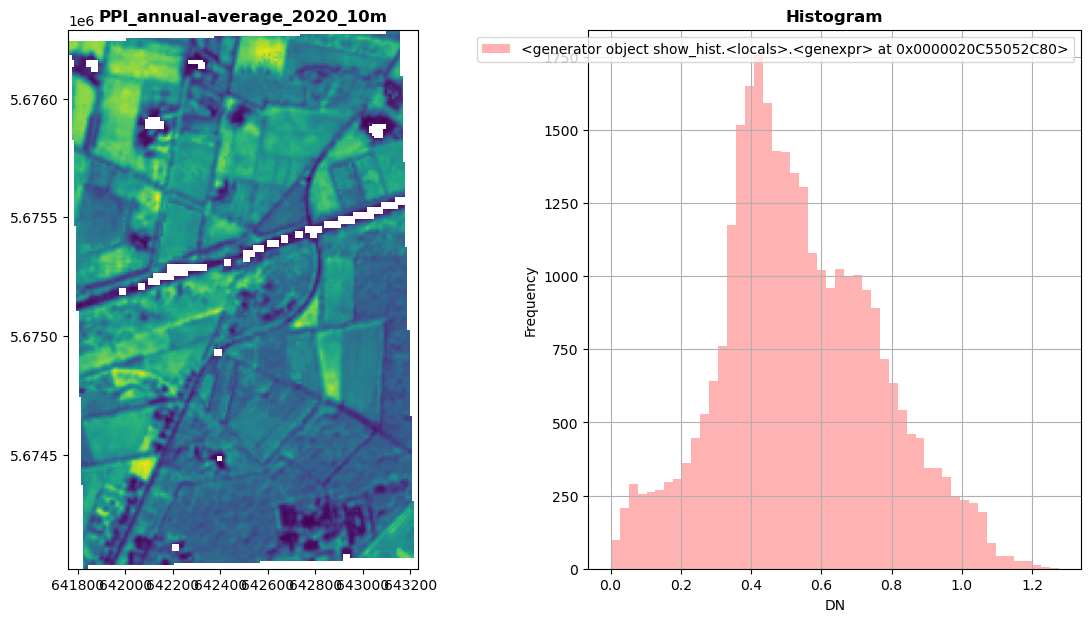

In [8]:
# visu result
with rasterio.open("PPI_annual-average_2020_10m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='PPI_annual-average_2020_10m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## fapar

In [9]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_fapar_10m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_fapar_10m.json",
    geometry=polygon,   
    year=2020)

In [10]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./fapar_annual-average_2020_10m.tif')

Wall time: 19.2 s


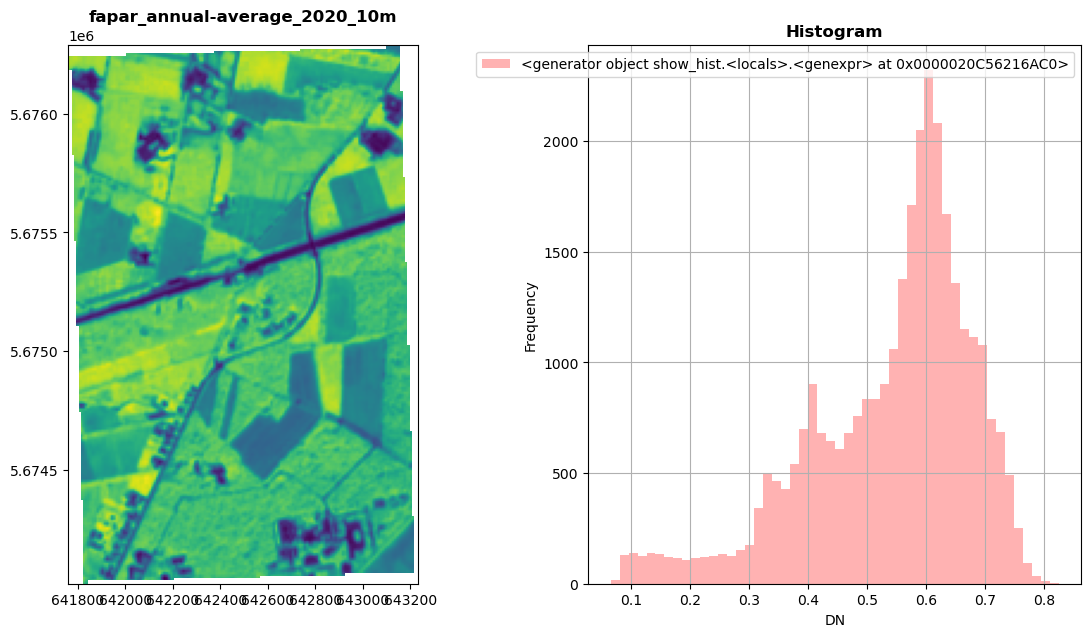

In [11]:
# visu result
with rasterio.open("fapar_annual-average_2020_10m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='fapar_annual-average_2020_10m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## NDVI

In [12]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi_10m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi_10m.json",
    geometry=polygon,   
    year=2020)

In [13]:
%time cube.download(r'./ndvi_annual-average_2020_10m.tif')

Wall time: 20.8 s


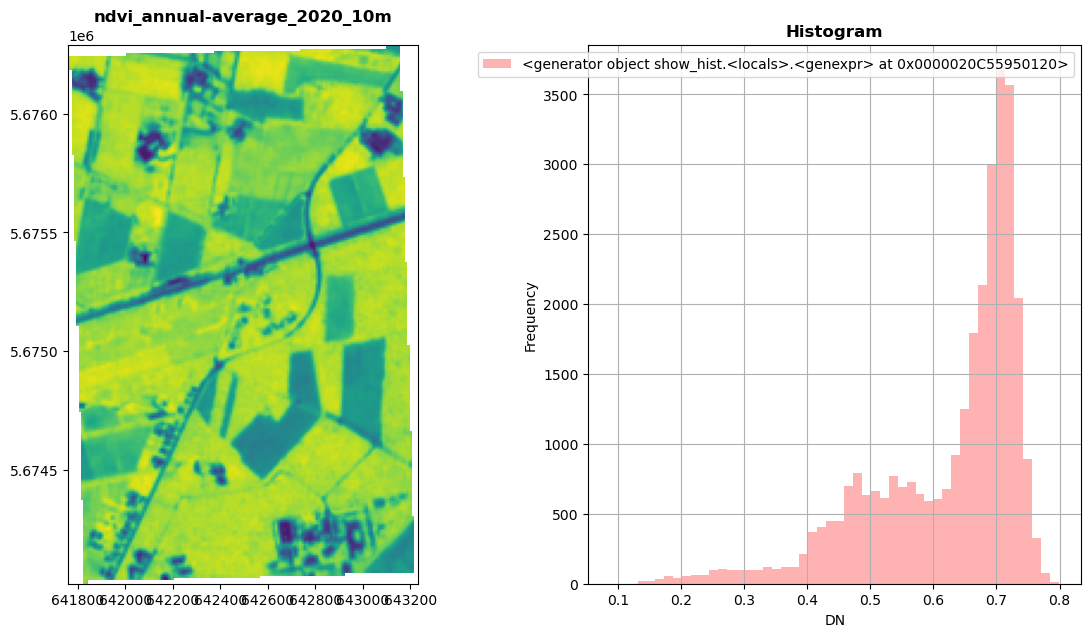

In [14]:
# visu result
with rasterio.open("ndvi_annual-average_2020_10m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='ndvi_annual-average_2020_10m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## LAI

In [15]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_lai_10m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_lai_10m.json",
    geometry=polygon,   
    year=2020)

In [16]:
%time cube.download(r'./lai_annual-average_2020_10m.tif')

Wall time: 20 s


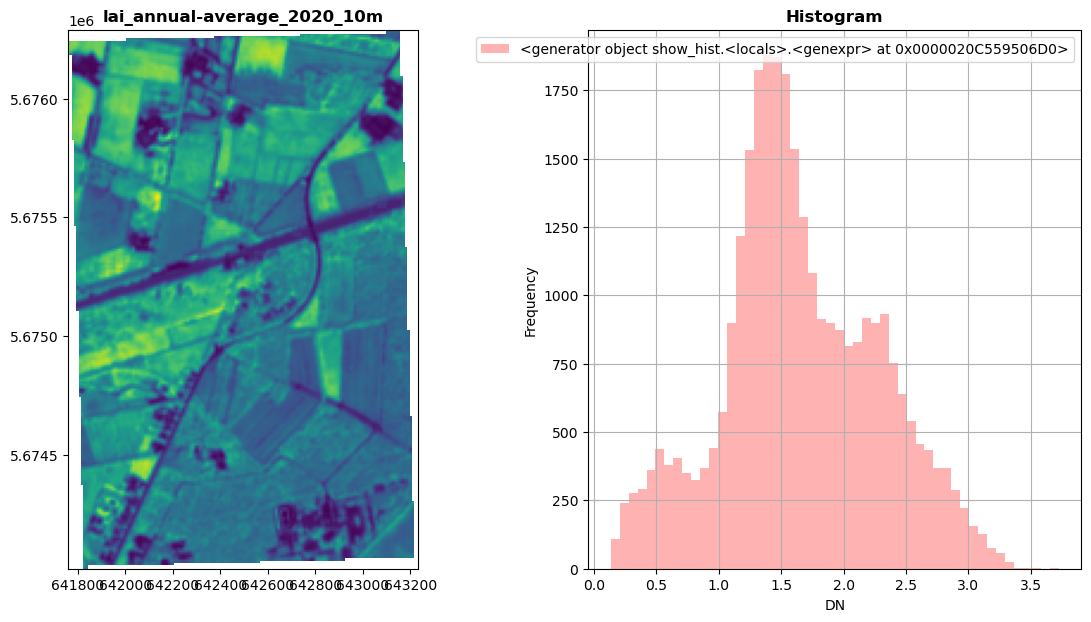

In [17]:
# visu result
with rasterio.open("lai_annual-average_2020_10m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='lai_annual-average_2020_10m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## FCOVER

In [18]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_fcover_10m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_fcover_10m.json",
    geometry=polygon,   
    year=2020)

In [19]:
%time cube.download(r'./fcover_annual-average_2020_10m.tif')

Wall time: 17.2 s


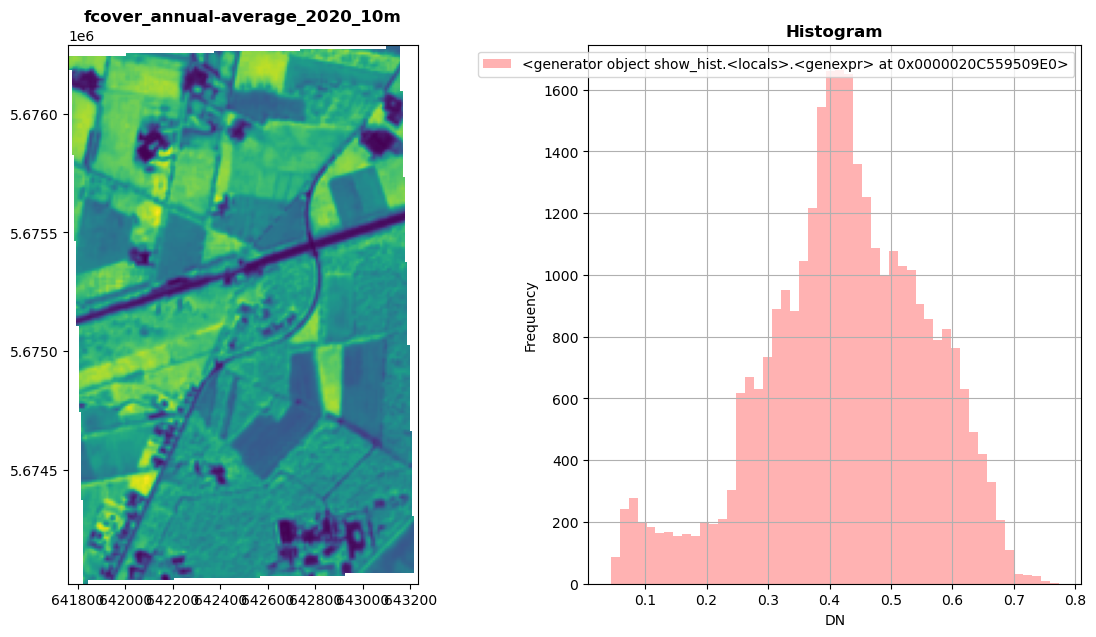

In [20]:
# visu result
with rasterio.open("fcover_annual-average_2020_10m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='fcover_annual-average_2020_10m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

##  just for completness ESA forest carbon monitoring biomass

In [21]:
cube1 = connection.datacube_from_process(
    process_id="udp_biomass_fcm-20m",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_biomass_fcm-20m.json",
    geometry=polygon,   
    year=2020,
    band='AGB')

In [22]:
%time cube1.download(r'./biomass-agb_2020_EPSG4326_20m_dataset.tif')

Wall time: 14.6 s


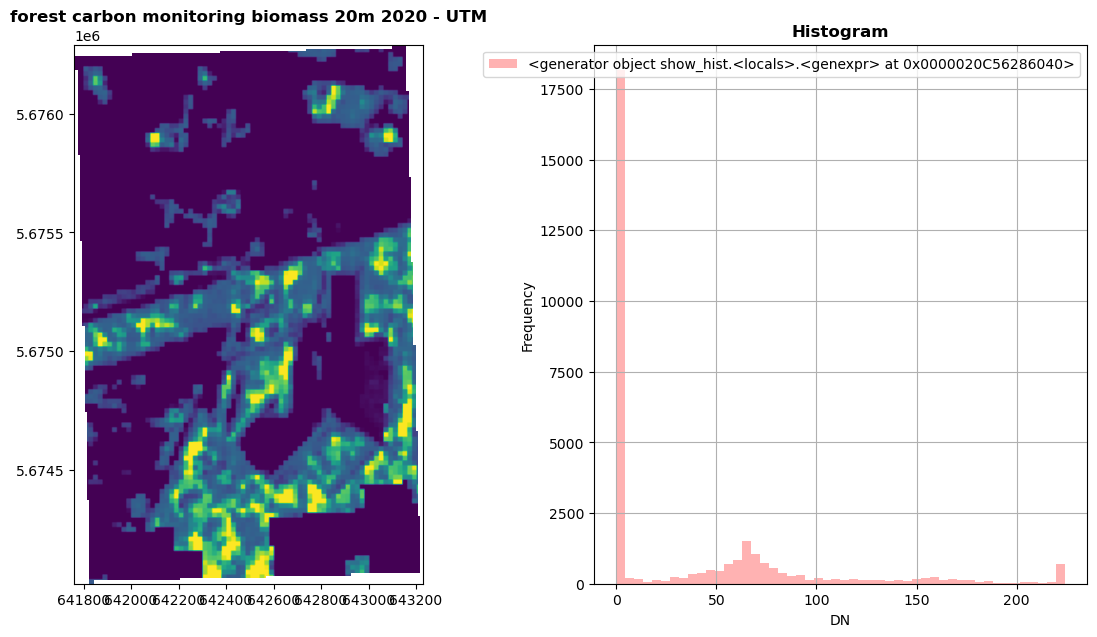

In [23]:
with rasterio.open("biomass-agb_2020_EPSG4326_20m_dataset.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='forest carbon monitoring biomass 20m 2020 - UTM')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()